In [ ]:
pip install scikit-learn==1.1.3

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
boston_dataset=datasets.load_boston()
boston_dataset

In [ ]:
boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd.columns=boston_dataset.feature_names
boston_pd_target=np.asarray(boston_dataset.target)
boston_pd["House Price"]=pd.Series(boston_pd_target)

X=boston_pd.iloc[:,:-1]
Y=boston_pd.iloc[:, -1]

In [ ]:
boston_pd

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35)

In [ ]:
x_test

In [ ]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)

In [ ]:
lreg_y_pred=lreg.predict(x_test)
lreg_y_pred

In [ ]:
mean_squared_error=np.mean((lreg_y_pred-y_test)**2)
print("Mean Squared Error on test set:",mean_squared_error)

Mean Squared Error on test set: 26.434471481726842


In [ ]:
lreg_coefficient=pd.DataFrame()
lreg_coefficient["Columns"]=x_train.columns
lreg_coefficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.101516
1        ZN              0.046565
2     INDUS              0.048389
3      CHAS              2.252555
4       NOX            -13.295118
5        RM              4.665445
6       AGE             -0.012461
7       DIS             -1.216184
8       RAD              0.276368
9       TAX             -0.014393
10  PTRATIO             -0.913303
11        B              0.009134
12    LSTAT             -0.388463


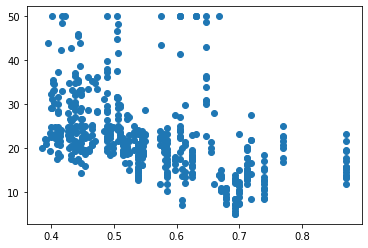

In [ ]:
plt.scatter(boston_pd["NOX"],boston_pd["House Price"])

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

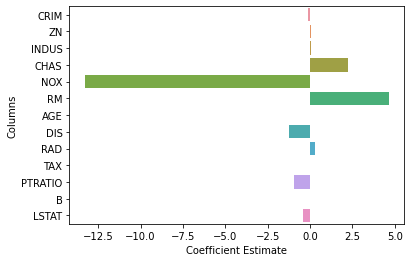

In [ ]:
import seaborn as sns
sns.barplot(x="Coefficient Estimate",y="Columns",data=lreg_coefficient)

## Import Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridgeR=Ridge(alpha=2)
ridgeR.fit(x_train,y_train)
y_pred=ridgeR.predict(x_test)

In [ ]:
mean_squared_error_ridge=np.mean((y_pred-y_test)**2)
print(mean_squared_error_ridge)

27.326077174981936


In [ ]:
ridge_coefficient=pd.DataFrame()
ridge_coefficient["Columns"]=x_train.columns
ridge_coefficient["Linear Coeff.Estimate"]=pd.Series(lreg.coef_)
ridge_coefficient["Ridge Coeff.Estimate"]=pd.Series(ridgeR.coef_)
print(ridge_coefficient)

## Import Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.05)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)

In [ ]:
mean_squared_error=np.mean((y_pred1-y_test)**2)
print("Mean squared error on test set:",mean_squared_error)

Mean squared error on test set: 28.091339285049578


In [ ]:
lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"]=x_train.columns
lasso_coeff["Linear Coeff.Estimate"]=pd.Series(lreg.coef_)
lasso_coeff["Lasso Coeff.Estimate"]=pd.Series(lasso.coef_)
print(lasso_coeff)

    Columns  Linear Coeff.Estimate  Lasso Coeff.Estimate
0      CRIM              -0.101516             -0.096128
1        ZN               0.046565              0.047214
2     INDUS               0.048389             -0.006191
3      CHAS               2.252555              1.412457
4       NOX             -13.295118             -0.000000
5        RM               4.665445              4.712816
6       AGE              -0.012461             -0.022534
7       DIS              -1.216184             -1.021895
8       RAD               0.276368              0.258285
9       TAX              -0.014393             -0.016520
10  PTRATIO              -0.913303             -0.757424
11        B               0.009134              0.009795
12    LSTAT              -0.388463             -0.407193


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

e_net=ElasticNet(alpha=.01,l1_ratio=.3)
e_net.fit(x_train,y_train)
y_pred_elastic=e_net.predict(x_test)
mean_squared_error=np.mean((y_pred_elastic-y_test)**2)
print("Mean squared error on the test set:",mean_squared_error)

Mean squared error on the test set: 27.4057936382098


In [ ]:
e_net_coeff=pd.DataFrame()
e_net_coeff["Columns"]=x_train.columns
e_net_coeff["Linear Coeff.Estimate"]=pd.Series(lreg.coef_)
e_net_coeff["Elastic Coeff.Estimate"]=pd.Series(e_net.coef_)
print(e_net_coeff)

    Columns  Linear Coeff.Estimate  Elastic Coeff.Estimate
0      CRIM              -0.101516               -0.098229
1        ZN               0.046565                0.047562
2     INDUS               0.048389                0.003302
3      CHAS               2.252555                1.940286
4       NOX             -13.295118               -3.683011
5        RM               4.665445                4.690966
6       AGE              -0.012461               -0.020499
7       DIS              -1.216184               -1.095362
8       RAD               0.276368                0.263327
9       TAX              -0.014393               -0.015796
10  PTRATIO              -0.913303               -0.801228
11        B               0.009134                0.009552
12    LSTAT              -0.388463               -0.402079
